In [1]:
import pandas as pd

In [2]:
# Cleaned Dataset
path="C:\\Users\\basva\\Downloads\\insurance.csv"
df=pd.read_csv(path)     # importing Data
df.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [3]:
# Type of Dataset
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
#shape of Dataset
df.shape 

(1338, 7)

In [5]:
# columns in Dataset
df.columns 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
# Information about Dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#checking null values in Dataset
df.isnull().sum()  

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
print(df['charges'].min())  # minimum value of charges
print(df['charges'].max())  # maximum value of charges
print(df['charges'].mean()) # mean of charges
print(df['charges'].median()) # median of charges 
print(df['charges'].std())  #std of charges

1121.8739
63770.42801
13270.422265141257
9382.033
12110.011236693994


<AxesSubplot:>

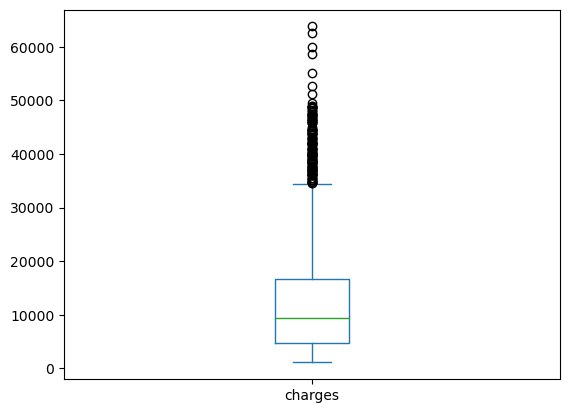

In [9]:
# Box plot for charges
df['charges'].plot(kind='box') 

* Box plot is used for univariate and bivariate analysis.
* Box plot is used to find the outliers.
* In this charges column we find outliers but charges is the target column.
* That's why we didn't remove outliers.

<AxesSubplot:ylabel='Density'>

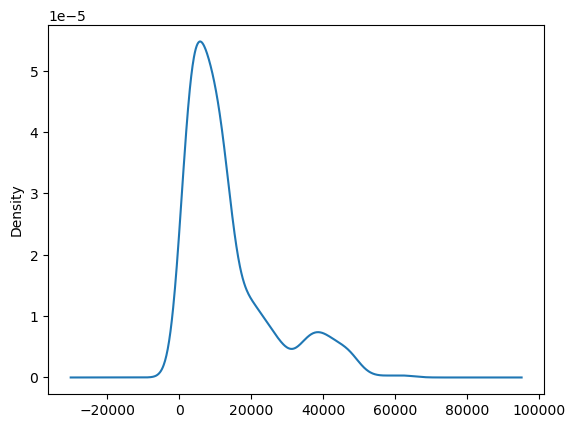

In [10]:
# Kde plot for charges
df['charges'].plot(kind='kde')

* Kde plot is used for univariate analysis.
* Here,the charges higest density is located at 0-15000.

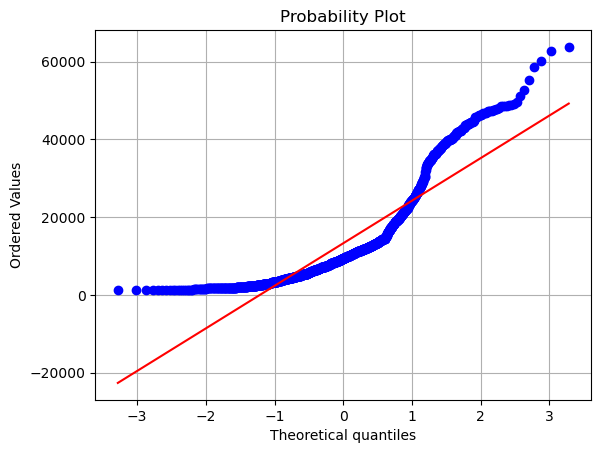

In [11]:
# QQ plot for charges
from scipy import stats
import matplotlib.pyplot as plt
stats.probplot(df['charges'],dist='norm',plot=plt)
plt.grid()


* Here the charges column is not normally distributed.

<AxesSubplot:ylabel='Frequency'>

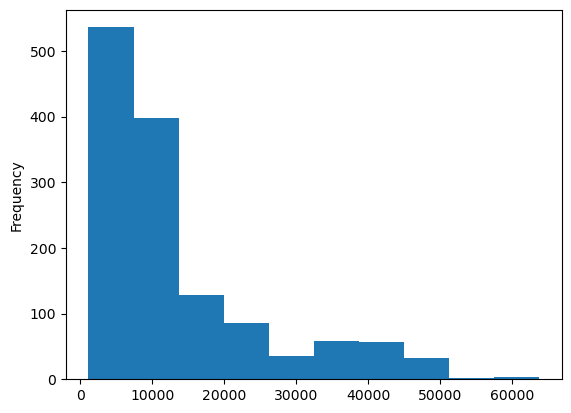

In [12]:
#Hist plot for charges
df['charges'].plot(kind='hist')

* Histogram is used for univariate analysis.
* The range between 0-10000 having the higest frequency when compared to others. 

In [13]:
print(df['age'].min()) # minimum value of age
print(df['age'].max()) # maximum value of age
print(df['age'].mean()) # mean  of age
print(df['age'].median()) # median of age
print(df['age'].std()) # std of age

18
64
39.20702541106129
39.0
14.049960379216172


<AxesSubplot:>

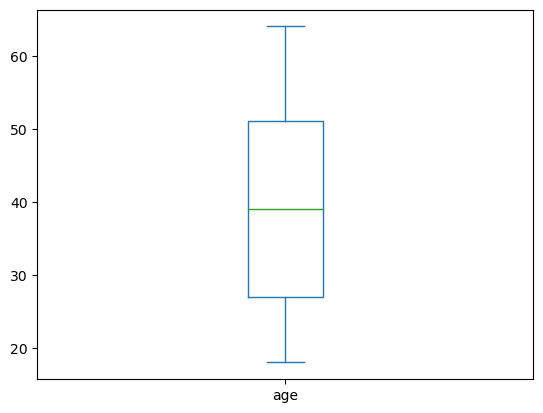

In [14]:
# Box plot for age
df['age'].plot(kind='box')

* Box plot is used for univariate and bivariate analysis.
* Box plot is used to find the outliers.
* Here we draw box plot for age column and we didn't find any outliers in it.

<AxesSubplot:ylabel='Density'>

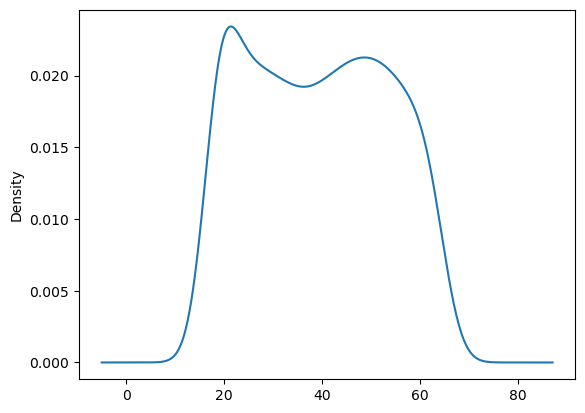

In [15]:
#kde plot for age
df['age'].plot(kind='kde')

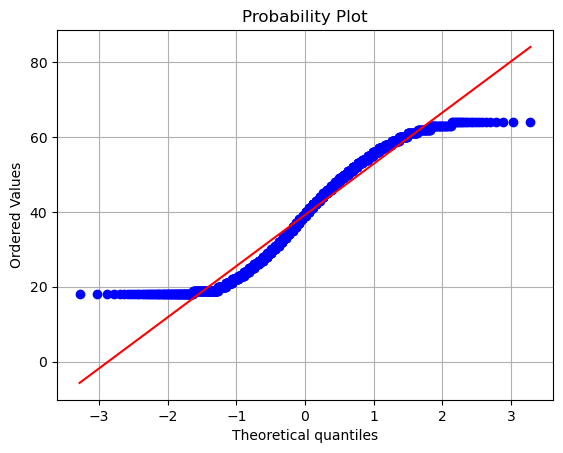

In [16]:
#QQ plot for age
stats.probplot(df['age'],dist='norm',plot=plt)
plt.grid()

<AxesSubplot:ylabel='Frequency'>

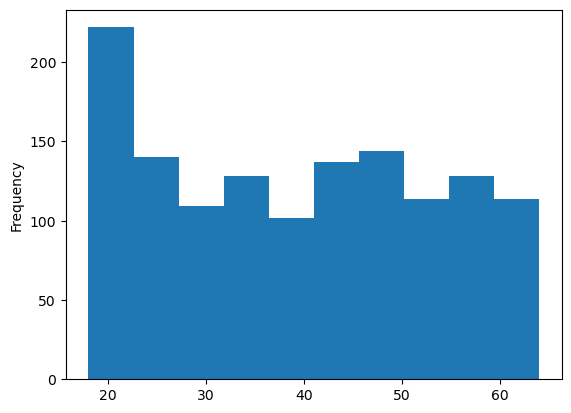

In [17]:
#Hist plot for age
df['age'].plot(kind='hist')

In [18]:
print(df['bmi'].min()) # minimum value of bmi
print(df['bmi'].max()) # maximum value of bmi
print(df['bmi'].mean()) # mean of bmi
print(df['bmi'].median()) # median of bmi
print(df['bmi'].std()) # std of bmi

15.96
53.13
30.663396860986538
30.4
6.098186911679017


<AxesSubplot:>

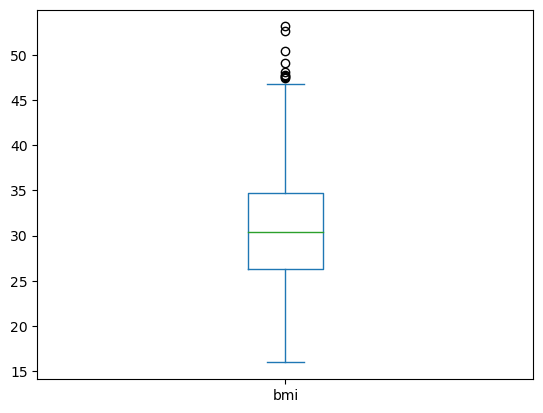

In [19]:
# Box plot for bmi
df['bmi'].plot(kind='box')

* we find outliers in bmi column to remove those outliers we apply IQR method. 

<AxesSubplot:ylabel='Density'>

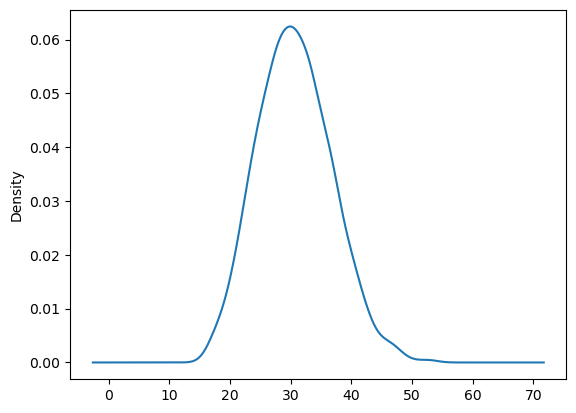

In [20]:
# Kde plot for bmi
df['bmi'].plot(kind='kde')

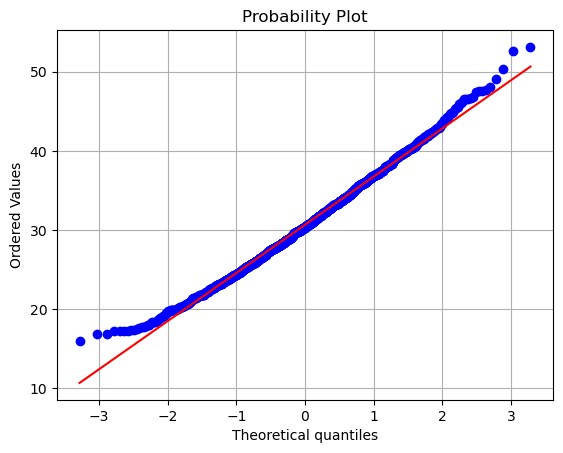

In [21]:
#QQ plot for bmi
stats.probplot(df['bmi'],dist='norm',plot=plt)
plt.grid()

In [22]:
# Removing of outliers by using IQR method
q1=df['bmi'].quantile(0.25)
q3=df['bmi'].quantile(0.75)
IQR=q3-q1
bmi_lower_bound=q1-1.5*IQR
bmi_upper_bound=q3+1.5*IQR
clean_df=df[(df['bmi']>bmi_lower_bound)&(df['bmi']<bmi_upper_bound)]
print(clean_df.shape)
print(df.shape)


(1329, 7)
(1338, 7)


In [23]:
print(clean_df['bmi'].min()) # minimum value of  cleaned bmi
print(clean_df['bmi'].max()) # maximum value of cleaned bmi
print(clean_df['bmi'].mean()) # mean of cleaned bmi
print(clean_df['bmi'].median()) # median of cleaned bmi
print(clean_df['bmi'].std()) # std of cleaned bmi

15.96
46.75
30.53734762979683
30.3
5.919946435122974


<AxesSubplot:>

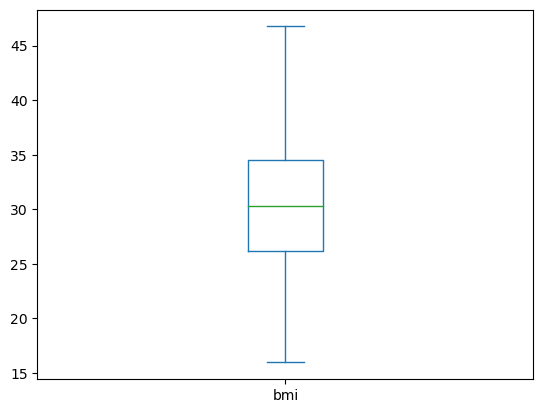

In [24]:
# Box plot for cleaned bmi
clean_df['bmi'].plot(kind='box')

* This is the box plot for cleaned bmi column 

<AxesSubplot:ylabel='Density'>

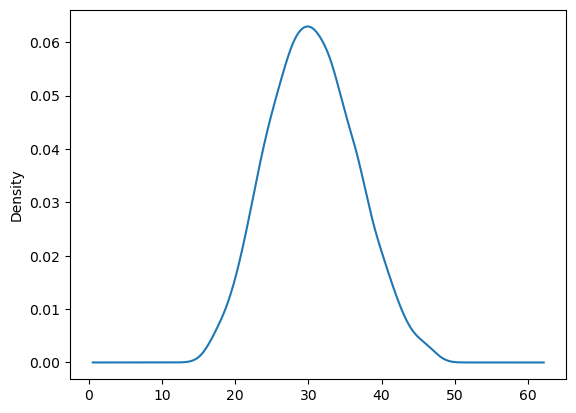

In [25]:
# Kde plotfor cleaned bmi
clean_df['bmi'].plot(kind='kde')

* Highest density is located at bmi=30

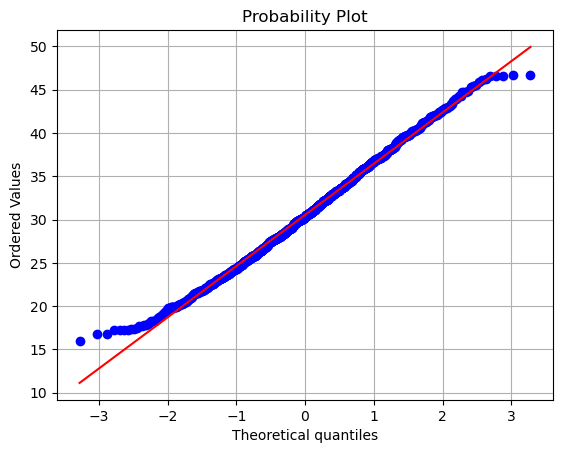

In [26]:
#QQ plot for cleaned bmi
stats.probplot(clean_df['bmi'],dist='norm',plot=plt)
plt.grid()

<AxesSubplot:ylabel='Frequency'>

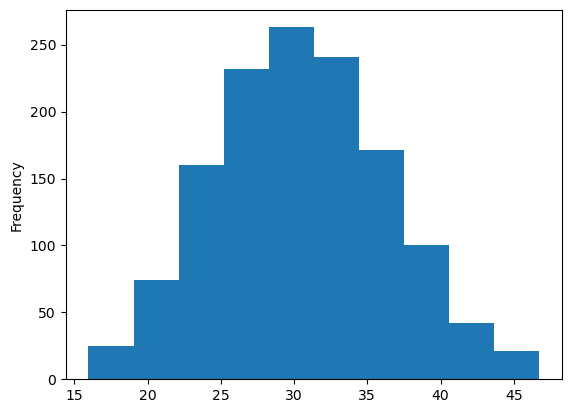

In [27]:
#Hist plot for bmi
clean_df['bmi'].plot(kind='hist')

In [28]:
print(df['children'].min())  # minimum value of  children
print(df['children'].max())  # maximum value of  children
print(df['children'].mean()) # mean of  children
print(df['children'].median())  # median of  children
print(df['children'].std())  # std of  children

0
5
1.0949177877429
1.0
1.2054927397819095


<AxesSubplot:>

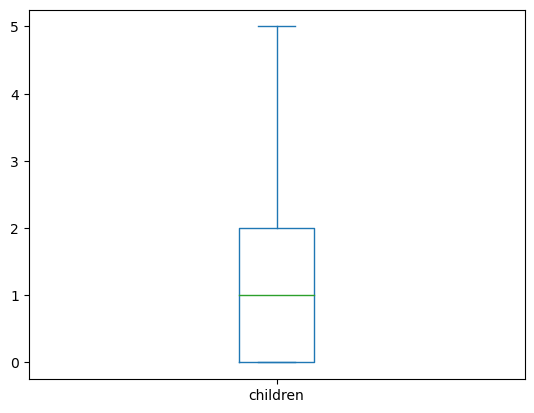

In [29]:
#Box plot for children
df['children'].plot(kind='box')

<AxesSubplot:ylabel='Density'>

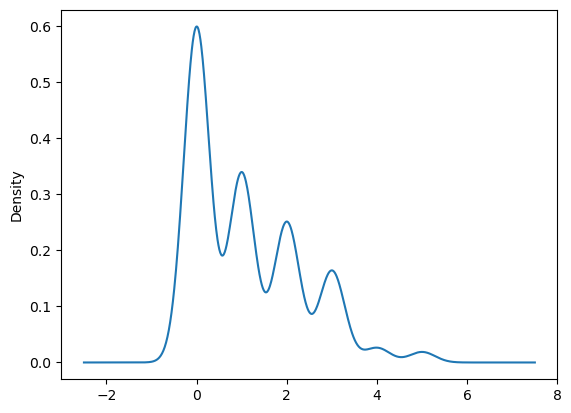

In [30]:
#Kde plot for children
df['children'].plot(kind='kde')

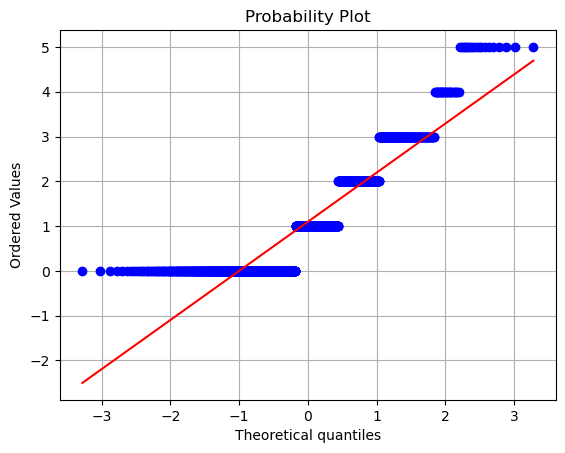

In [31]:
#QQ plot for children
stats.probplot(df['children'],dist='norm',plot=plt)
plt.grid()

* The children features is not normally distributed

<AxesSubplot:ylabel='Frequency'>

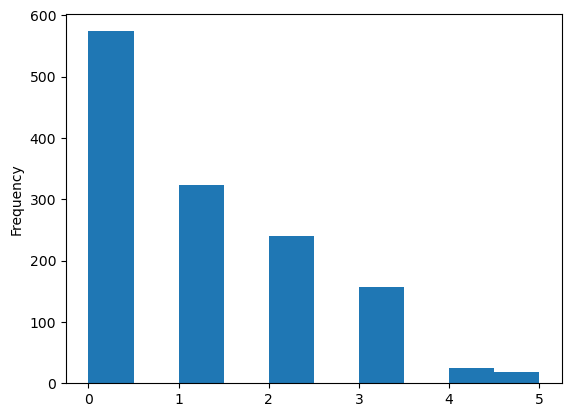

In [32]:
#Hist plot for children
df['children'].plot(kind='hist')

## Univariate (Categorical columns)

In [33]:
df['sex'].value_counts(normalize=True)

male      0.505232
female    0.494768
Name: sex, dtype: float64

<AxesSubplot:>

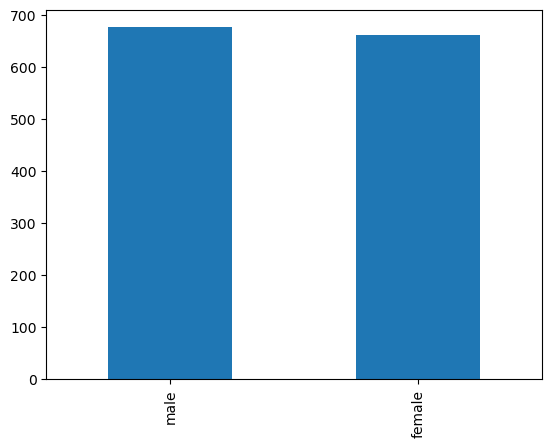

In [34]:
#Bar plot for sex column
df['sex'].value_counts().plot(kind='bar')

* By using this bar plot we find that no.of males > no. of.females.

<AxesSubplot:ylabel='sex'>

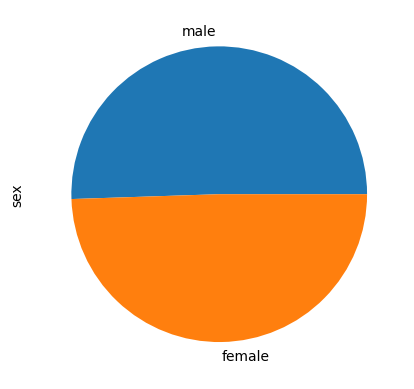

In [35]:
#Pie chart for sex column
df['sex'].value_counts().plot(kind='pie')

In [36]:

df['smoker'].value_counts(normalize=True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

<AxesSubplot:>

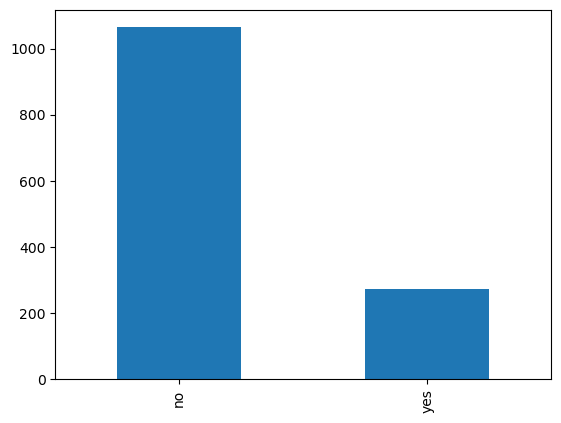

In [37]:
#Bar plot for smoker column
df['smoker'].value_counts().plot(kind='bar')

* In this plot we observe that non-smokers are greater then smokers.

<AxesSubplot:ylabel='smoker'>

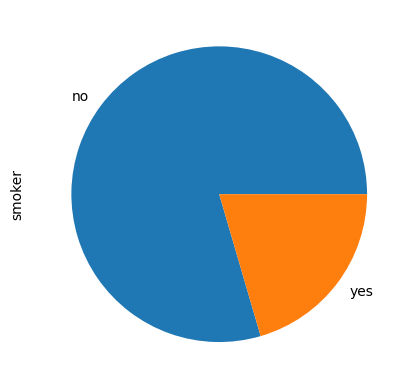

In [38]:
#Pie chart for smoker column
df['smoker'].value_counts().plot(kind='pie')

In [39]:

df['region'].value_counts(normalize=True)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64

<AxesSubplot:>

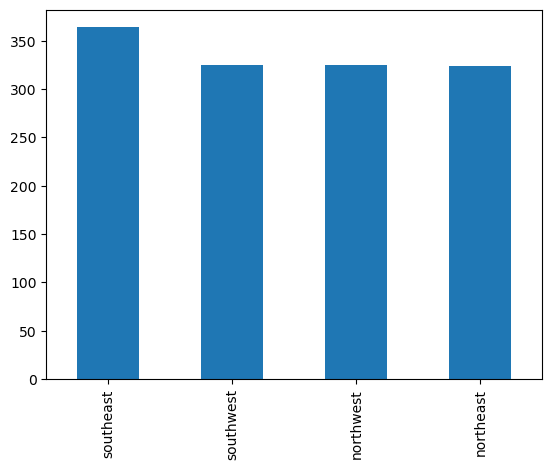

In [40]:
# Bar plot for region column
df['region'].value_counts().plot(kind='bar')

* southeast region having higest count value when compared to other regions.

<AxesSubplot:ylabel='region'>

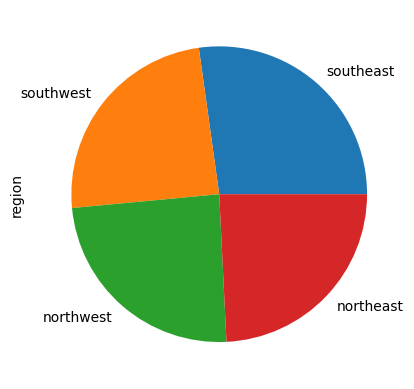

In [41]:
#Pie chart for region column
df['region'].value_counts().plot(kind='pie')

## Bivariate analysis(num vs num)

<AxesSubplot:xlabel='charges', ylabel='age'>

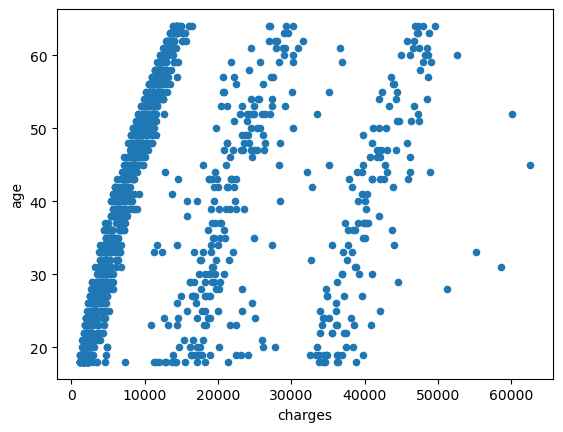

In [42]:
# scatter plot for two numerical columns charges,age
clean_df.plot(kind='scatter',x='charges',y='age')

* scatter plot is used for Bivariate analysis.
* As age increases the charges will be impacted more.
* so,there is a positive relationship between age and charges.

<AxesSubplot:xlabel='charges', ylabel='bmi'>

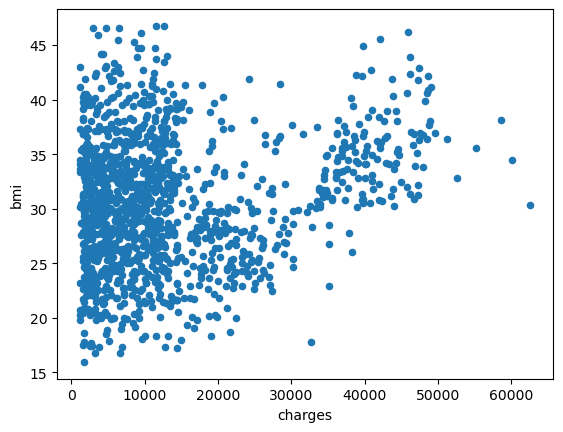

In [43]:
# scatter plot for two numerical columns charges,bmi
clean_df.plot(kind='scatter',x='charges',y='bmi')

* There is no relationship between charges and bmi

<AxesSubplot:xlabel='charges', ylabel='children'>

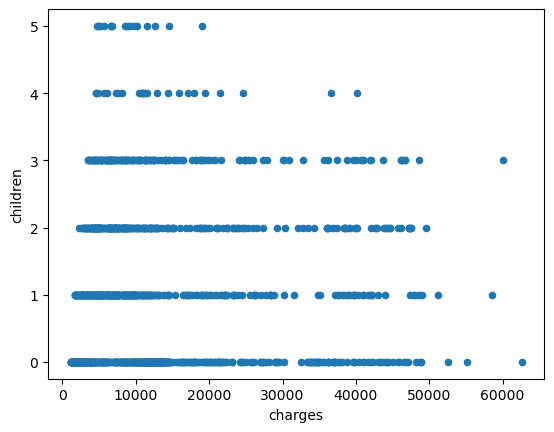

In [44]:
# scatter plot for two numerical columns charges,children
clean_df.plot(kind='scatter',x='charges',y='children')

* There is no relationship between charges and children.

<AxesSubplot:title={'center':'charges'}, xlabel='smoker'>

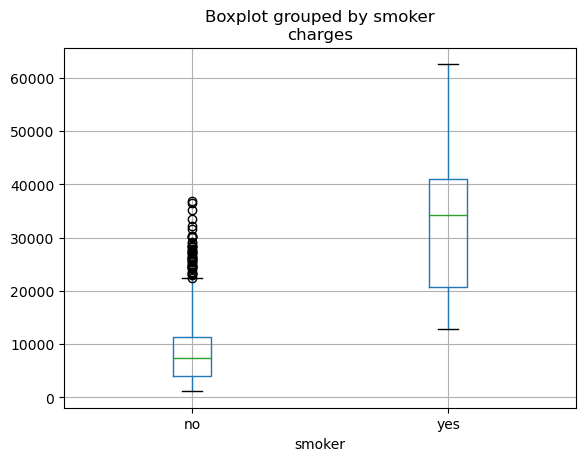

In [45]:
# Box plot for one numerical,one categorical column: charges,smoker
clean_df.boxplot(by='smoker',column='charges')

* There is a Positive relationship between smoker=yes and charges. 
* Those who smokes heavy they will get more medical costs when compared to non smokers.

<AxesSubplot:title={'center':'charges'}, xlabel='sex'>

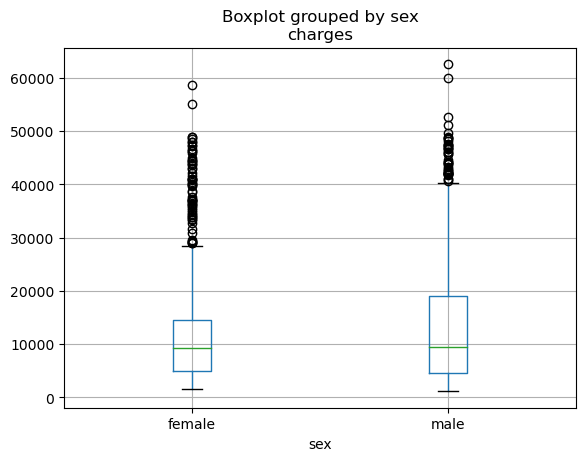

In [46]:
# Box plot for one numerical,one categorical column: charges,s
clean_df.boxplot(by='sex',column='charges')

* There is no relationship between sex and charges.

<AxesSubplot:title={'center':'charges'}, xlabel='region'>

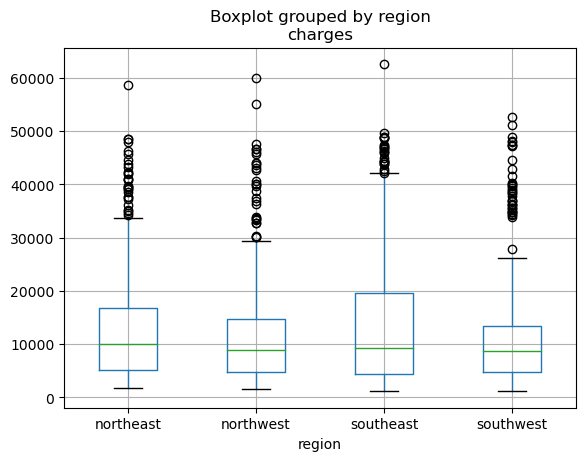

In [47]:
# Box plot for one numerical,one categorical column: charges,region
clean_df.boxplot(by='region',column='charges')

* There is no relation between region and charges.
* southeast region spending more charges when compared to others.

In [49]:
clean_df.to_csv('Healthcare')